In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets

In [2]:
#딕셔너리 형태. 4개 컬럼
iris = datasets.load_iris()
iris

# 1열은 레이블
# 나머지 열은 feature로 둘 것

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# 키 값만 확인 ; 7개
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
data = iris['data']
data.shape

#150행 4열

(150, 4)

In [5]:
# 붓꽃 데이터(프랑스 국화; 꽃잎의 길이와 너비, 꽃받침의 길이와 너비)

iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris['target']

# 종 분류 
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
# 데이터 레이블이 연속된 데이터(ex. 점수, 수익 등등)

# 꽃잎(sepal)의 길이(length)와 너비(width)와 꽃받침(petal)의 길이(length)와 너비(width)를 가지고 
# 꽃잎의 길이를 예측할 것

In [8]:
# 1차원 벡터면 안되기 때문에 대괄호로 한번 더 감싸줌
# x 데이터 추출
# feature와 label 구분하기

xdata = data[:,1:]

ydata = data[:,[0]]


In [9]:
x = tf.placeholder(tf.float32, shape = [None,3])
y = tf.constant(ydata, tf.float32)

In [10]:
#feature 3개 label 1개 랜덤하게
w = tf.Variable( tf.random_uniform([3,1]))
b = tf.Variable( tf.random_uniform([1]))

In [11]:
hx = tf.matmul(x,w) + b
cost = tf.reduce_mean( tf.square(hx-y))

In [12]:
# argument로 learning mate를 투입, 정규화를 위해 매우 작은 값 투입
optimizer = tf.train.GradientDescentOptimizer( 0.01 ) 

train = optimizer.minimize( cost )

In [13]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [14]:
for i in range(10000) :
    # x가 placeholder이므로 feed_dict 줘야 함
    sess.run( train, {x:xdata} )
    print(i, sess.run(cost, {x:xdata}))

0 0.7680433
1 0.52569413
2 0.460192
3 0.43039617
4 0.40874022
5 0.3897744
6 0.37236074
7 0.35620564
8 0.34118482
9 0.32721227
10 0.3142132
11 0.30211928
12 0.2908672
13 0.280398
14 0.27065703
15 0.26159337
16 0.25315967
17 0.24531189
18 0.23800893
19 0.23121291
20 0.22488815
21 0.21900198
22 0.21352346
23 0.20842434
24 0.20367782
25 0.1992596
26 0.19514641
27 0.1913171
28 0.18775173
29 0.1844319
30 0.18134049
31 0.1784614
32 0.17577995
33 0.17328225
34 0.17095542
35 0.16878752
36 0.16676752
37 0.16488504
38 0.16313046
39 0.16149482
40 0.15996985
41 0.15854785
42 0.15722153
43 0.15598428
44 0.15482979
45 0.15375239
46 0.15274668
47 0.15180758
48 0.15093042
49 0.15011096
50 0.1493452
51 0.14862932
52 0.14795984
53 0.14733347
54 0.14674737
55 0.14619856
56 0.1456845
57 0.14520277
58 0.14475107
59 0.1443274
60 0.14392972
61 0.14355624
62 0.14320537
63 0.14287528
64 0.14256486
65 0.14227247
66 0.14199695
67 0.14173715
68 0.14149192
69 0.14126037
70 0.14104138
71 0.14083421
72 0.14063796
73 

In [15]:
sess.run(w)

array([[ 0.6966566],
       [ 0.7341384],
       [-0.5997691]], dtype=float32)

In [16]:
sess.run(b)

array([1.6721328], dtype=float32)

In [17]:
# 길이 예측 -> x를 행렬로 투입해야 함
sess.run(hx, {x:[[3.5,1.4,0.2]]})

array([[5.0182705]], dtype=float32)

<function matplotlib.pyplot.show(*args, **kw)>

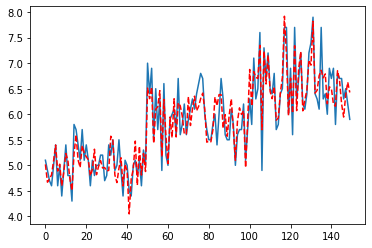

In [18]:
plt.plot(ydata)                             # 실제 값 : 파란 선
plt.plot(sess.run(hx, {x:xdata}), "r--")    # 예측 값 : 빨간 선
plt.show